In [1]:
import pandas as pd 
from typing import List, Dict, Any
import numpy as np



In [5]:
exp1 = "../results/ALL_complete_meaningful_2.csv"
exp2 = "../results/ALL_complete_meaningful.csv"
exp3 = "../results/Baseline_20_meaningful.csv"
exp4 = "../results/Baseline_20_random.csv"
exp5 = "../results/SGD_20_random.csv"
exp6 = "../results/SGD_complete_meaningful.csv"

In [56]:
df1 = pd.read_csv(exp1)
df2 = pd.read_csv(exp2)
df3 = pd.read_csv(exp3)
df4 = pd.read_csv(exp4)
df5 = pd.read_csv(exp5)
df6 = pd.read_csv(exp6)

df5['dataset_type'] = 'random'
df6['dataset_type'] = 'meaningful'

df_56 = pd.concat([df5, df6], axis=0)

df3['optimizer'] = 'baseline'
df4['optimizer'] = 'baseline'

df3['dataset_type'] = 'meaningful'
df4['dataset_type'] = 'random'

df_34 = pd.concat([df3, df4], axis=0)

df = pd.concat([df_34, df_56], axis=0)


### Experiments to run

In [61]:
df.columns

Index(['dataset', 'index', 'layer', 'learning_rate', 'optimizer',
       'token_length', 'match', 'inversion_time', 'timesteps', 'times',
       'dataset_type'],
      dtype='object')

In [60]:
dataset_type = 'meaningful'
optimizer = 'SGD'
layer = 4
learning_rates = df[df['optimizer'] == optimizer]['learning_rate'].unique().tolist()

df_experiment_8_1 = df[]


[1.0, 0.1, 0.01]


### Plotting

In [34]:
def compute_statistics(df: pd.DataFrame, column_name: str = "timesteps", indices: List[int] = [10]):
    assert column_name in ["timesteps", "times"], "Choises for `column_name`: ['timesteps', 'times']."
    
    column = df[column_name]
    scores = column.apply(lambda x: list(float(i) for i in x.split("_")))

    scores = [
        scores.apply(lambda x: np.mean(x[:i + 1]))
        for i in indices
    ]

    return [
        (x.mean(), x.std())
        for x in scores
    ]

bloo = {
    x: compute_statistics(df1[df1['optimizer'] == x], indices=range(20), column_name='times')
    for x in ['Adam', 'AdamW', 'RMSprop']
}

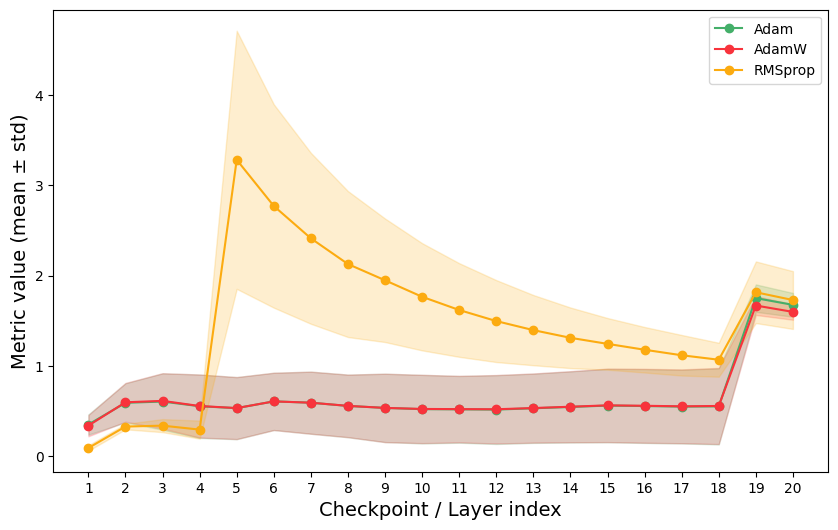

In [45]:
import sys
sys.path.append('..')

import matplotlib.pyplot as plt
from utils.metrics import _agg_metric
from utils.constants import COLORS

def _rename(name, rename_dict):
    """
    Rename a metric name based on a provided dictionary.
    Args:
        name (str): Original metric name.
        rename_dict (dict): Dictionary mapping original names to new names.
    Returns:
        str: Renamed metric name.
    """
    return rename_dict.get(name, name) if rename_dict else name


def plot_metrics(
        metrics, 
        fill_between=True, 
        rename=None, 
        xlabel=None,
        ylabel=None,
        title=None,
        figsize=(10, 6),
        integer_xticks=False  # New parameter
):  
    """
    Plot aggregated metrics per layer.
    Args:
        metrics (dict): Dictionary containing metric values for each layer.
        fill_between (bool): Whether to fill the area between mean and std.
        rename (dict): Optional dictionary to rename labels of metrics.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
        title (str): Title of the plot.
        figsize (tuple): Size of the plot.
        integer_xticks (bool): Whether to force x-axis ticks to be integers.
    """
    agg_metrics = {}
    for metric in metrics:
        agg_metrics[metric] = _agg_metric(metrics, metric)
    fig, ax = plt.subplots(figsize=figsize)

    for i, (metric_name, (mean, std)) in enumerate(agg_metrics.items()):
        x_ticks = range(len(mean))
        
        if fill_between:
            ax.fill_between(x_ticks, mean - std, mean + std, alpha=0.2, color=COLORS[i % len(COLORS)])
        
        ax.plot(mean, label=_rename(metric_name, rename), color=COLORS[i % len(COLORS)], marker='o')

    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend()

    if integer_xticks:
        ax.set_xticks(range(len(mean)))
        ax.set_xticklabels([str(x + 1) for x in x_ticks])

    plt.show()
  
plot_metrics(
    metrics=bloo,
    xlabel="Checkpoint / Layer index",
    ylabel="Metric value (mean ± std)",
    title="", integer_xticks=True
) 

In [25]:
# print columns with uniques values 
def print_unique_columns(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Column: {column}, Unique values: {unique_values}")


# Plotting Experiment 2 

In [26]:
print_unique_columns(df12)

Column: dataset, Unique values: ['token_length_filtered_dataset.csv']
Column: index, Unique values: [0 1 2 3 4 5 6 7 8 9]
Column: layer, Unique values: [4]
Column: learning_rate, Unique values: [0.01 1.  ]
Column: optimizer, Unique values: ['Adam' 'AdamW' 'RMSprop']
Column: token_length, Unique values: [20]
Column: match, Unique values: [ True]
Column: inversion_time, Unique values: [ 20.92394352  23.16146302  18.77070904  18.17362976  21.56206465
  18.08984542  19.00598383 133.53544545  19.87070227  15.57244444
  20.49819398  23.43648076  19.46755981  18.70466161  22.06325674
  18.39428163  18.75789785 125.87159395  19.64991283  15.32918692
   9.786731    12.05488276   8.40075135   9.27157784  11.47732067
   7.05476165   8.26860595 125.61394978   9.10261989  80.78740621
   2.63861823   2.52050972   2.07424045   2.8558774    2.91652989
   2.22158504   2.51750231 213.06782103   3.25891304 117.56600642
   2.66802812   2.52497172   2.04329276   2.87625432   3.31027627
   2.23083639   2.51

In [29]:
layer = 4
learning_rate = 0.01
optimizer_list = ['Adam', 'AdamW', 'RMSprop']
type = "timesteps"
results_4_001 = {}

for optimizer in optimizer_list:
    df_filtered = df12[(df12["layer"] == layer) & (df12["learning_rate"] == learning_rate) & (df12["optimizer"] == optimizer)]
    result = compute_time_steps(df_filtered, type=type, last_timestep=list(range(20)))
    print(f"Results for layer {layer}, learning rate {learning_rate}, optimizer {optimizer}:")
    print(result)


Results for layer 4, learning rate 0.01, optimizer Adam:
{'mean_timesteps_0': np.float64(50.3), 'std_timesteps_0': np.float64(0.0), 'mean_timesteps_1': np.float64(86.5), 'std_timesteps_1': np.float64(42.1), 'mean_timesteps_2': np.float64(98.03333333333333), 'std_timesteps_2': np.float64(47.56022793113632), 'mean_timesteps_3': np.float64(96.375), 'std_timesteps_3': np.float64(51.310030647698355), 'mean_timesteps_4': np.float64(93.20000000000002), 'std_timesteps_4': np.float64(50.242646780429155), 'mean_timesteps_5': np.float64(98.11666666666666), 'std_timesteps_5': np.float64(55.95389228848838), 'mean_timesteps_6': np.float64(99.38571428571429), 'std_timesteps_6': np.float64(54.68701868437718), 'mean_timesteps_7': np.float64(95.925), 'std_timesteps_7': np.float64(54.6872776104113), 'mean_timesteps_8': np.float64(96.9), 'std_timesteps_8': np.float64(58.66389698011629), 'mean_timesteps_9': np.float64(95.58000000000001), 'std_timesteps_9': np.float64(57.964850175505546), 'mean_timesteps_10